# Project 1: First steps in Machine Learning (70 Points)
In this project, you will train and evaluate your first machine learning models. We provide a structure with a lot of **TODO**s guiding you through the work. Please read the following information carefully.

## Grading
You can gain a total of 70 points in this project.

Please follow the **TODO**s in this notebook. There are practical and theoretical tasks to do.<br>
When working on the tasks please consider the following information:
* write short texts in **full sentences** answering the **TODO**s. Note, that points are given primarily for reporting and analyzing results (assuming you provide the code to reproduce these results). 
* have a look at all imports in this notebook; they already define which method you should use


## Organizational and Deadline
On Monday, **November 11th**, there will be a Q&A session in the tutorials! Start to work on this project **from now on** and take the offer to resolve any remaining ambiguity.
This assignment is due on **November 19th**. Please upload your solution to the Moodle as an ipynb-file.<br>
For a submission you need to be part of an assignment group.

# Part 1: Training your first models

## 1a) kNN - Classifier

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from fontTools.misc.cython import returns

# load dataset_1.npz
# the data and labels are saved in X and y, respectively
data_set = np.load('C:\\Users\\pauls\\PycharmProjects\\Machine_Learning\\project_1\\dataset_1.npz')
X = data_set['X']
y = data_set['y']

### The first dataset

**TODO:** Take a closer look at the dataset, e.g. number of samples, dimensionality, labels, etc.

Number of samples: 800
Number of features per sample: 2
Number of labels: 800
Unique labels in the dataset: [0 1]
Data type of X: float64
Data type of y: int64
Shape of X: (800, 2)
Shape of y: (800,)

First entries of X:
 [[-9.90563823 -2.0449525 ]
 [ 7.34236575 11.11383874]
 [11.80651259 -3.90171984]
 [ 5.89950613  2.43333158]
 [-6.18872749 -9.48871318]]

First entries of y:
 [0 0 0 1 0]


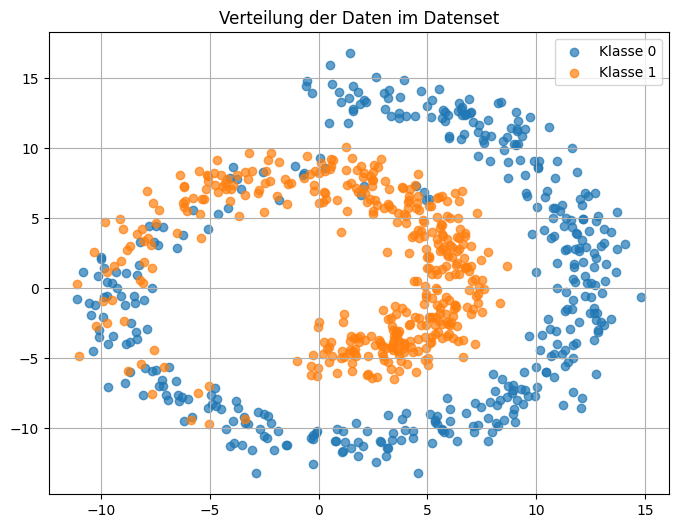

In [43]:
num_samples, num_features = X.shape
num_labels = y.shape[0]
unique_labels = np.unique(y)

print(f"Number of samples: {num_samples}")
print(f"Number of features per sample: {num_features}")
print(f"Number of labels: {num_labels}")
print(f"Unique labels in the dataset: {unique_labels}")
print(f"Data type of X: {X.dtype}")
print(f"Data type of y: {y.dtype}")


print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print()
print("First entries of X:\n", X[:5])
print()
print("First entries of y:\n", y[:5])

plt.figure(figsize=(8, 6))

for class_value in np.unique(y):
    plt.scatter(X[y == class_value, 0], X[y == class_value, 1], label=f'Klasse {class_value}', alpha=0.7)

plt.title('Verteilung der Daten im Datenset')
plt.legend()
plt.grid(True)
plt.show()

### Splitting the data

For the first part of the exercise, use this data split:

In [4]:
n_train = int(0.7*X.shape[0]) # 70% sample
n_test_val = int(0.15*X.shape[0]) # 15% sample of as test and val

X_train = X[:n_train] # select first 70%
y_train = y[:n_train] # corresponding labels from above

X_test = X[n_train:n_train+n_test_val] # test values from n to n + n_test_val
y_test = y[n_train:n_train+n_test_val] # again labels

X_val = X[n_train+n_test_val:] # validation vals from n + n_test_val to end
y_val = y[n_train+n_test_val:] # l

**TODO**: Train and evaluate a kNN classifier with k=3 and report the model's accuracy on the train, validation and test set. Use the data as splitted above.

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [7]:
knn_1a = KNeighborsClassifier(n_neighbors=3)
knn_1a.fit(X_train, y_train)

y_train_pred = knn_1a.predict(X_train)
y_val_pred = knn_1a.predict(X_val)
y_test_pred = knn_1a.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {round(train_accuracy, 4)}")
print(f"Validation Accuracy: {round(val_accuracy, 4)}")
print(f"Test Accuracy: {round(test_accuracy, 4)}")

Training Accuracy: 0.9554
Validation Accuracy: 0.9083
Test Accuracy: 0.875


**TODO:** Report your results. Are there difference in the train/validation/test accuracy? Why? Does the model perform well on the dataset?

>**Answer:**
> - The training accuracy of 95.5% is fairly high, which indicates that the model fits the dataset well
> - The validation accuracy of 90.8% is also high, which means that the model works well with unseen data
> - The test accuracy of 87.5% is a bit lower, which indicates that the model does not perform well on the test data
>
>
>These accuracy differences can occur due to many different reasons. Some could be overfitting (for small k like 3), difference in data distribution (like edge cases and noisy data) and also the size of the data. While our train data contains 70% of the entire data set, both the validation and test data are only based on 15% each.
>
>
>Overall does the kNN classifier perform pretty good on the data, even though we can see a decrease in performance. 
>This means that the kNN model still needs some tuning to be able to work better on the given data.

**TODO**: Train and test the kNN classifier for different values of k on dataset 1.
- Use the train set to train the classifier and the validation set to evaluate the performance.
- Plot the validation accuracy for different values of k. Choose all possible values for k.
- Finally train the kNN classifier with the optimal k and report the accuracy on the test set.

In [8]:
accuracies = []
#k_list = []

#choose only odd k due to binary classification, as seen above from y_label
max_k = X_train.shape[0]


for k in range(1, max_k+1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
        
    y_train_pred_1 = knn.predict(X_train)
    y_val_pred_1 = knn.predict(X_val)
        
    val_accuracy_1 = accuracy_score(y_val, y_val_pred_1)
        
    accuracies.append(val_accuracy_1)

#this would be for only odd k, but the code above is easier to work with due to arr length issues
#for k in range(1, max_k+1):
#    if k % 2 != 0:
#        knn = KNeighborsClassifier(n_neighbors=k)
#        knn.fit(X_train, y_train)
#        
#        y_train_pred_1 = knn.predict(X_train)
#        y_val_pred_1 = knn.predict(X_val)
#        
#        val_accuracy_1 = accuracy_score(y_val, y_val_pred_1)
#        
#        k_list.append(k)
#        accuracies.append(val_accuracy_1)

#### Plotting

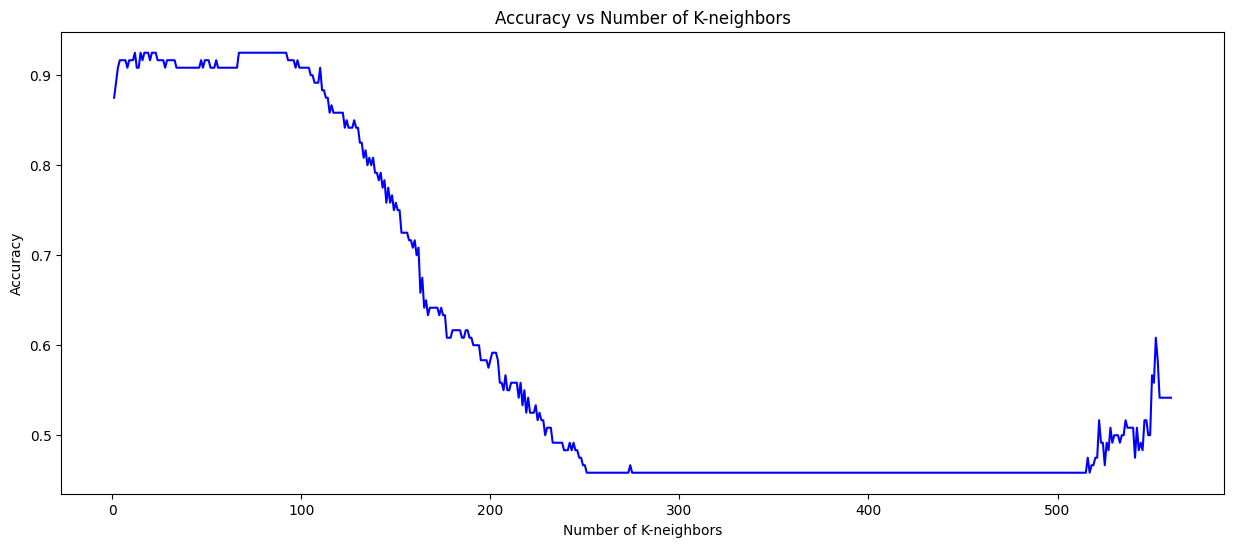

In [42]:
plt.figure(figsize=(15, 6))
#plt.plot(k_list, accuracies, color="b")
plt.plot(range(1, max_k+1), accuracies, color="b")
plt.title("Accuracy vs Number of K-neighbors")
plt.xlabel("Number of K-neighbors")
plt.ylabel("Accuracy")
plt.show()

In [12]:
# first one
#optimal_k_list = []
#optimal_k = 2 * (accuracies.index(max(accuracies))) + 1 # compensate only odd k from before
optimal_k = accuracies.index(max(accuracies))

#for k_opt in accuracies:
#    if k_opt == max(accuracies):
#        optimal_k_list.append(accuracies.index(k_opt))

#print(f"List of all optimal k's: ")
#print(optimal_k_list)

print(f"Optimal number of K-neighbors: {optimal_k}")

Optimal number of K-neighbors: 11


In [13]:
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train, y_train)

y_test_pred_opt = knn_optimal.predict(X_test)
test_accuracy_opt = accuracy_score(y_test, y_test_pred_opt)

print(f"Test accuracy with optimal k = {optimal_k}: {round(test_accuracy_opt, 4)}")

Test accuracy with optimal k = 11: 0.925


**TODO:** Answer the following questions in a **full text**.

* Describe your choice of values of k. Why did you choose them?
> After testing all possible k in range [1, max_k + 1], I was able to plot all test accuracies, as seen above. From there we can see, that small k values (like 1, 3, 5) are pretty good, but they still tend to overfit due to the high "flexibility" and high values (>10) smooth out the boundries, which leads to underfitting due to generalization. 
Therefor I think that a k between 9 and 99 would be a good fit. This can also be seen in the results above. The first optimal k is k=11 and also other values for k until almost 100.
* For which values of k does the model perform best? How did you determine this?
> The optimal k is 11, which I have done by looking at the highest accuracy.
* Would this value perform best on another dataset as well? Why/ Why not?
> The optimal k=11 would probably not perform well on other data due to different reasons. kNN works always best on the data it was trained on. Every new dataset we predict with a trained model can have a different data size, outliers, or it has a more complex decision boundary, so that our model would perform badly on another dataset.
* What is the smallest and the greatest possible value for k? What would happen if we would choose these special values?
> The smallest possible value would be k=1, this one will most likely lead to overfitting. The highest would be k=number of samples (here 560), which would most likely tend to underfitting. We can see in the plot, that both k's are far from an optimal/ maximal solution.

## 1b) Logistic Regression
Let's try another model as well. We will use the same dataset and split as before.

**TODOs**: 
- Train and evaluate logistic regression on the given split of dataset 1. Report the train, test and validation accuracy.
- Plot the dataset and decision boundary (own implementation, see lecture slides 53/54 in slides1.pdf) where the decision boundary is optimized on the complete dataset (X).
- Based on the accuracy and plot, answer the question below.

In [14]:
from sklearn.linear_model import LogisticRegression

In [28]:
log_reg = LogisticRegression(max_iter=10000000)
log_reg.fit(X_train, y_train)

y_train_pred = log_reg.predict(X_train)
y_val_pred = log_reg.predict(X_val)
y_test_pred = log_reg.predict(X_test)

print(f"Training Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print(f"Validation Accuracy: {accuracy_score(y_val, y_val_pred):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")

Training Accuracy: 0.4893
Validation Accuracy: 0.6167
Test Accuracy: 0.5333


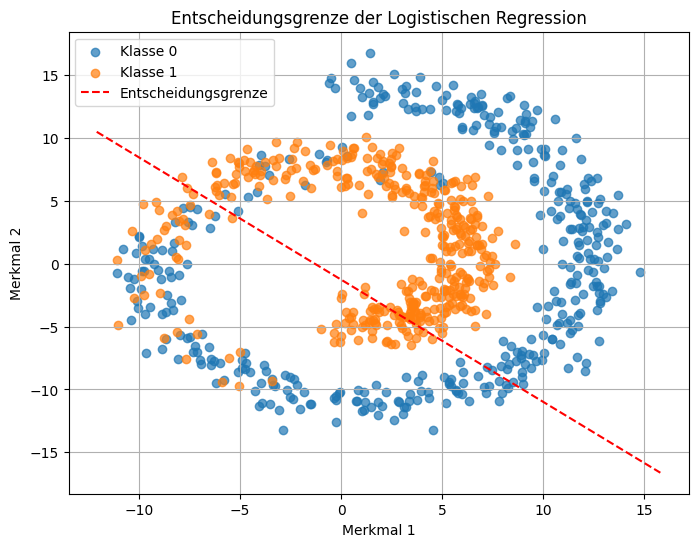

In [44]:
plt.figure(figsize=(8, 6))
for class_value in np.unique(y):
    plt.scatter(X[y == class_value, 0], X[y == class_value, 1], label=f'Klasse {class_value}', alpha=0.7)

coef = log_reg.coef_[0]
intercept = log_reg.intercept_

x_values = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100)

y_values = -(coef[0] * x_values + intercept) / coef[1]

plt.plot(x_values, y_values, color='red', linestyle='--', label='Entscheidungsgrenze')

plt.xlabel('Merkmal 1')
plt.ylabel('Merkmal 2')
plt.title('Entscheidungsgrenze der Logistischen Regression')
plt.legend()
plt.grid(True)
plt.show()

**TODO:** How does Logistic Regression perform on this dataset? How does this relate to the properties of the model and the dataset? Answer in full sentences.
>Dataset 1 might have overlapping classes or a non linear decision boundary, which makes Logistic Regression not the best without additional preprocessing (which we do in the next task).
The low accuracies indicate that the model might underfit the data, possibly due to the nature of Logistic Regression, which cannot capture complex relationships between different features.

## Polynomial Preprocessing

To achieve better performance, we apply polynomial preprocessing before fitting logistic regression. This can be done by constructing a pipeline as shown below.

**TODO:** Optimize the polynomial degree and plot the performance for different values of `degree`. Choose reasonable values of `degree`.  
* <font color='red'>Important: </font> Pass only one degree to PolynomialFeatures (not a tuple (min,max)) at each time and validate the whole pipeline! Remember to use the train set for training and the validation set to determine the optimal polynomial degree.



In [21]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

#estimators = [('poly', PolynomialFeatures(degree=1)), ('clf', LogisticRegression(max_iter=10000000))]
#pipe = Pipeline(estimators)

**TODO:** Given the best polynomial degree, train your model again, report the test accuracy and plot the decision boundary.

- Here you can use plot_2d_decisionboundary() from utils.py (see the following import), because plotting the decision boundary with preprocessing is more complicated.
Instead of calculating the decision boundary exactly, the function uses a grid-based approach, where each (x,y) position in the plot is colored according to the prediction of the estimator given (x,y).

C:\Users\pauls\PycharmProjects\Grundlagen_Inf_SoSe24\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\pauls\PycharmProjects\Grundlagen_Inf_SoSe24\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    h

Test Accuracy with polynomial degree 5: 0.9167


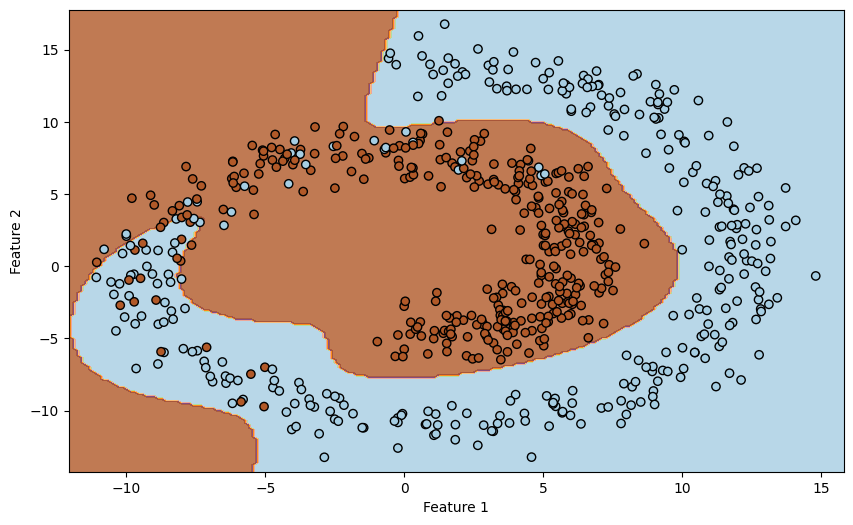

In [33]:
degree_list = []

for i in range(1,15):
    degrees = i
    ds_pipeline = Pipeline([('poly', PolynomialFeatures(degree=degrees)), ('clf', LogisticRegression(max_iter=1000000000))])
    ds_pipeline.fit(X_train, y_train)
    dsy_test_pred = ds_pipeline.predict(X_test)
    dstest_accuracy = accuracy_score(y_test, dsy_test_pred)
    degree_list.append(dstest_accuracy)

best_degree = degree_list.index(max(degree_list))+1

optimal_pipeline = Pipeline([('poly', PolynomialFeatures(degree=best_degree)), ('clf', LogisticRegression(max_iter=1000000000))])

optimal_pipeline.fit(X_train, y_train)

y_test_pred = optimal_pipeline.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy with polynomial degree {best_degree}: {round(test_accuracy, 4)}")

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

Z = optimal_pipeline.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', cmap=plt.cm.Paired)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', cmap=plt.cm.Paired)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

**TODO:** Report your results. Answer the following questions in full sentences.

* What degrees did you try out and why?  
> I aimed to try different degrees from 1 (linear relation) to more complex ones and I tried to find the one with the highest accuracy (highest one) that does not overfit.

* For what degree does the pipeline perform best?  
> The pipeline performs best with a polynomial degree of 5, achieving a test accuracy of 91.67%. This degree might be a balance between fitting the complexity of the data and preventing overfitting.

* Would this polynomial degree also perform best on another dataset?  
> No, that is unlikely, because the optimal degree depends very much on the underlying data. Different datasets may have different decision boundaries and so on, like in the tasks before.

## 1c) Comparing kNN and Logistic Regression
We want you to compare the kNN, logistic regression (without preprocessing) and polynomial regression (logistic regression with polynomial preprocessing). Use the previous dataset (dataset_1.npz) and dataset_2_a.npz.

**TODO:** Compare the performance of the kNN, Logistic Regression and Polynomial Regression. You can skip the hyperparameter tuning and use the best k and polynomial degree from before. Therefore, a simple train-test split is sufficient (e.g. 70:30)
- compare the accuracies of the three models/pipelines
- plot the decision boundaries (feel free to use plot_2d_decisionboundary())

In [53]:
from project_1.utils import plot_classification_dataset, plot_2d_decisionboundary


def train(dataset):
    if dataset == "dataset_1":
        data_2 = np.load('C:\\Users\\pauls\\PycharmProjects\\Machine_Learning\\project_1\\dataset_1.npz')
    elif dataset == "dataset_2_a":
        data_2 = np.load('C:\\Users\\pauls\\PycharmProjects\\Machine_Learning\\project_1\\dataset_2_a.npz')
    else:
        print("Wrong dataset.")
        
    X = data_set['X']
    y = data_set['y']
    plot_classification_dataset(X, y, title="Dataset")

    #Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

    #kNN model
    kneighbor = KNeighborsClassifier(n_neighbors=11)
    kneighbor.fit(X_train, y_train)
    acc_knn = accuracy_score(y_test, kneighbor.predict(X_test))
    plot_2d_decisionboundary(kneighbor, X_train, y_train, title="KNN Decisionboundary")

    #Logistic Regression
    clf = LogisticRegression().fit(X_train, y_train)
    acc_logreg = accuracy_score(y_test, clf.predict(X_test))
    plot_2d_decisionboundary(clf, X_train, y_train, title="LogReg Decisionboundary")

    #Polynomial Regression
    estimators = [('poly', PolynomialFeatures(degree=best_degree)), ('clf', LogisticRegression(max_iter=10000))]
    pipe = Pipeline(estimators)
    
    pipe.fit(X_train, y_train)
    acc_polyreg = accuracy_score(y_test, pipe.predict(X_test))
    plot_2d_decisionboundary(pipe, X_train, y_train, title="PolyReg Decisionboundary")

    #Accuracies
    print(acc_knn, acc_logreg, acc_polyreg)
    
    
    
    

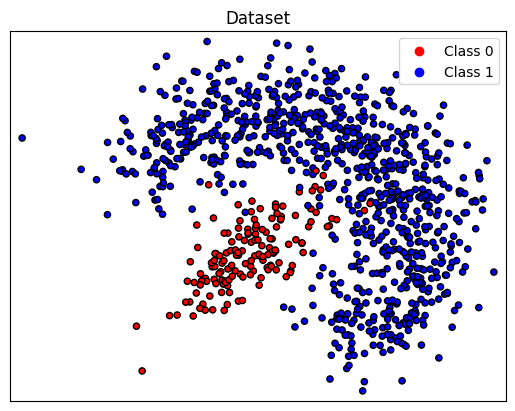

C:\Users\pauls\PycharmProjects\Grundlagen_Inf_SoSe24\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


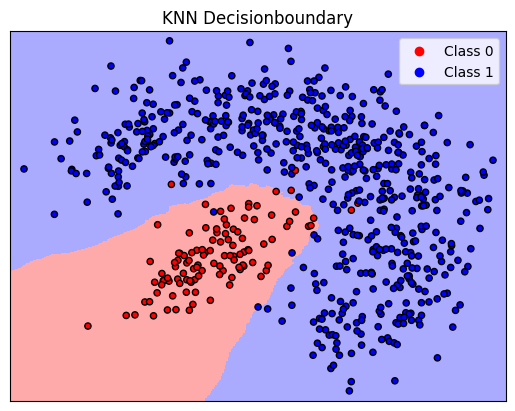

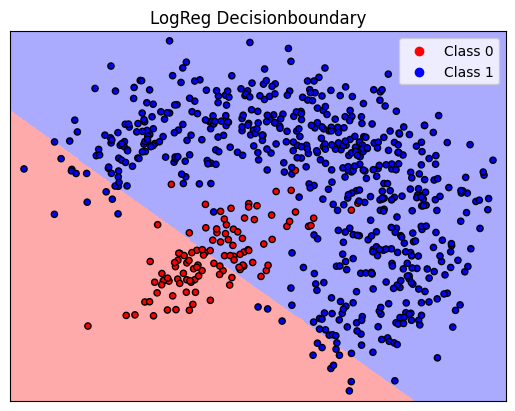

C:\Users\pauls\PycharmProjects\Grundlagen_Inf_SoSe24\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\pauls\PycharmProjects\Grundlagen_Inf_SoSe24\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


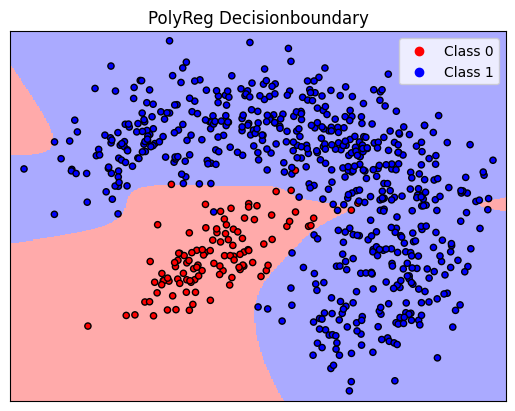

0.98 0.8766666666666667 0.97


In [54]:
train("dataset_1")

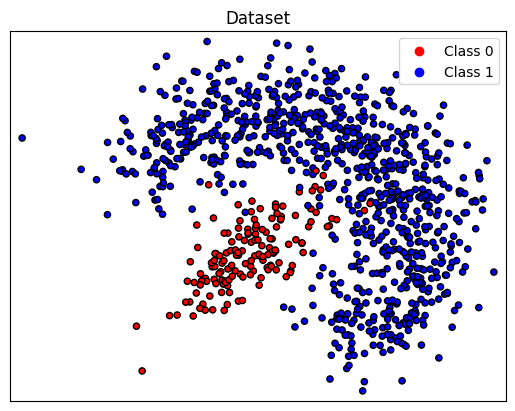

C:\Users\pauls\PycharmProjects\Grundlagen_Inf_SoSe24\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


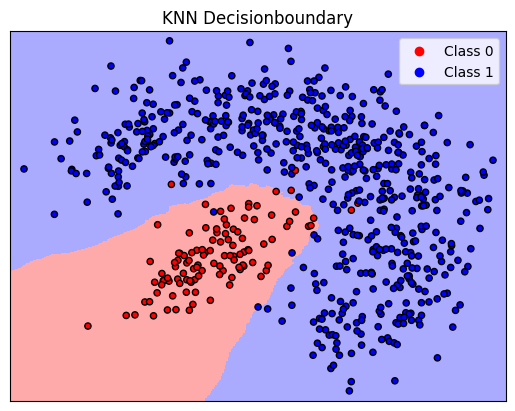

C:\Users\pauls\PycharmProjects\Grundlagen_Inf_SoSe24\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


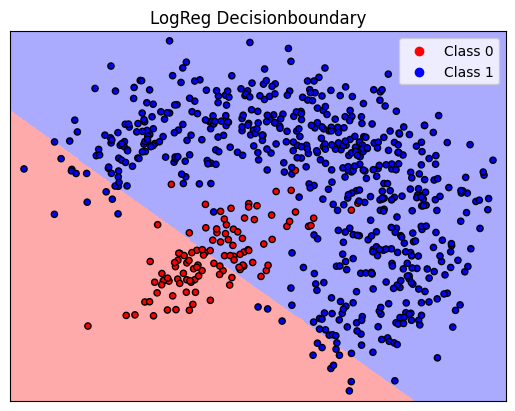

C:\Users\pauls\PycharmProjects\Grundlagen_Inf_SoSe24\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\pauls\PycharmProjects\Grundlagen_Inf_SoSe24\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


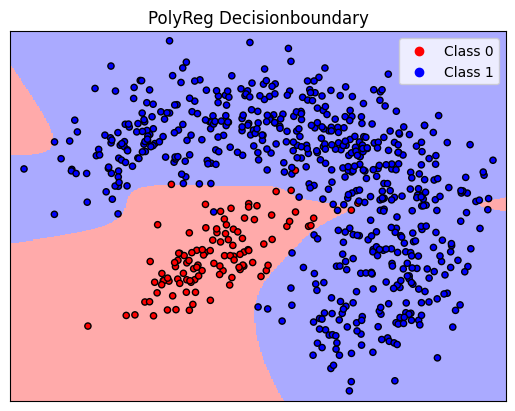

0.98 0.8766666666666667 0.97


In [55]:
train("dataset_2_a")

**TODO:** Describe your results and analyze them: Which model(s) perform(s) best on dataset 1 and 2? Is there a difference in the datasets causing this behavior? Take the classifier properties into account.

> For the first dataset, the KNN-Classifier performs best, closely followed by the Polynomial Regression. The Logistic Regression performs poorly on that dataset, which is expected, because the data is arranged in a rather spiral, non-linear way, which makes it difficult for the Logistic Regression to find a linear Decision-Boundary.
> For the second dataset, the Logistic Regression performs best, closely followed by the Polynomial Regression and the KNN. That makes sense, because the second dataset is arranged in such a way, that there is pretty clear line between both classes of datapoints, which is how the Logistic Regression finds it's decisionboundary. The other two models still perform quite good. The Polynomial Regression is pretty much a special case of the Logistic Regression, but it's probably overfitting for this dataset. The KNN still performs quite good, even with the best K we evaluated from the first dataset, because the datapoints are arranged in mostly distinct groups.

# Part 2: Model evaluation

Consider the following scenario: Two groups of students work on this assignment. They both use the function below to generate a train-test split and compare the performance of kNN and Logistic Regression. For simplicity you can ignore hyperparameter tuning and use `k=5` and `deg=2`. However both groups achieve different results. The code snippet below shows how they handled the comparison.

In [45]:
data_set = np.load('C:\\Users\\pauls\\PycharmProjects\\Machine_Learning\\project_1\\dataset_2_b.npz')
X = data_set['X']
y = data_set['y']

n = X.shape[0]

def group1_eval():
    print("group1:")
    n_train = int(4*n/5)
    X_train = X[:n_train]
    X_test = X[n_train:]
    y_train = y[:n_train]
    y_test = y[n_train:]
    
    knn = KNeighborsClassifier(n_neighbors= 5)  
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("knn accuracy: " + str(accuracy)) 
    
    estimators = [('poly', PolynomialFeatures(degrees)), ('clf', LogisticRegression(max_iter=5000))]
    pipe = Pipeline(estimators)
    pipe.fit(X_train, y_train)   
    accuracy = accuracy_score(y_test,pipe.predict(X_test))

    print("accuracy polynomial reggression: " +  str(accuracy))

    
def group2_eval():
    print("group2")
    n_test = int(n/5)
    X_train = X[n_test:]
    X_test = X[:n_test]
    y_train = y[n_test:]
    y_test = y[:n_test]
    
    knn = KNeighborsClassifier(n_neighbors= 5)  
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("knn accuracy: " + str(accuracy)) 
    
    estimators = [('poly', PolynomialFeatures(degrees)), ('clf', LogisticRegression(max_iter=5000))]
    pipe = Pipeline(estimators)
    pipe.fit(X_train, y_train)   
    accuracy = accuracy_score(y_test,pipe.predict(X_test))

    print("accuracy polynomial reggression: " +  str(accuracy))
    
group1_eval()
group2_eval()

group1:
knn accuracy: 0.9625
accuracy polynomial reggression: 0.9625
group2
knn accuracy: 0.91875
accuracy polynomial reggression: 0.93125


**TODO:** Explain why they achieve different results. Can you think of any better strategy than the simple train-test split to make the results more comparable? Feel free to add some code to underline your points or show your recommended approach.

* What do you think, whose results are correct?
> Neither of the groups results are actually correct, due to the train-test split, that is used. It simply can be the case. While knn focuses on local neighbours, polynomial regression looks at global patterns and their performance will be different on each dataset. Especially because the train-test split is prone to variability.
* How could they improve their evaluation to be more confident about the results? (hint: If we make a statement like classifier 1 outperforms classifier 2 on this dataset, the statement should be representative for the whole dataset. As always, efficient solutions are preferable!)
> By using a k-fold cross-validation to evaluate both models on different splits, we are able to provide better answers about the data.

**TODO:** Implement your recommended approach.

In [46]:
from sklearn.model_selection import cross_val_score, KFold

k = 5

knn = KNeighborsClassifier(n_neighbors=5)
kf = KFold(n_splits=k, shuffle=True, random_state=42)
knn_scores = cross_val_score(knn, X, y, cv=kf)

degree = 3 
pipe = Pipeline([('poly', PolynomialFeatures(degree=degree)),('clf', LogisticRegression(max_iter=500))])

pipe_scores = cross_val_score(pipe, X, y, cv=kf)

print("Accuracy knn:" + str(np.mean(knn_scores)))
print("Accuracy Polynomial Regression:" + str(np.mean(pipe_scores)))

Accuracy knn:0.925
Accuracy Polynomial Regression:0.9324999999999999


# Part 3: Yet another Dataset

**TODO:** Load dataset 3. Train and report the accuracy for kNN and logistic regression (without polynomial preprocessing).
You may use a simple train-test split or the strategy you proposed in part 2.

In [48]:
from sklearn.model_selection import train_test_split # can we use this?

data_set = np.load('C:\\Users\\pauls\\PycharmProjects\\Machine_Learning\\project_1\\dataset_3.npz')
X = data_set['X']
y = data_set['y']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)
log_reg = LogisticRegression(max_iter=10000000)

knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)

knn_accuracy = accuracy_score(y_test, knn_pred)
log_reg_accuracy = accuracy_score(y_test, log_reg_pred)

print(f'kNN Accuracy: {knn_accuracy * 100:.2f}%')
print(f'Logistic Regression Accuracy: {log_reg_accuracy * 100:.2f}%')

kNN Accuracy: 98.00%
Logistic Regression Accuracy: 90.00%


In [50]:
n_train = int(0.7*X.shape[0])
X_train = X[:n_train]
y_train = y[:n_train]
X_test = X[n_train:]
y_test = y[n_train:]


knn = KNeighborsClassifier(n_neighbors=3)  
knn.fit(X_train, y_train)

X_class_zero = X[y==0]
y_zero = np.zeros(len(X_class_zero))

y_zero_pred = knn.predict(X_class_zero)
accuracy = accuracy_score(y_zero,y_zero_pred)

print("Genauigkeit knn klasse 0:", accuracy)


X_class_one = X[y==1]
y_one = np.ones(len(X_class_one))

y_ones_pred = knn.predict(X_class_one)
accuracy = accuracy_score(y_one,y_ones_pred)

print("Genauigkeit knn klasse 1:", accuracy)



log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

accuracy = accuracy_score(y_zero, log_reg.predict(X_class_zero))
print("Genauigkeit log-reg klasse 0:", accuracy)

accuracy = accuracy_score(y_one, log_reg.predict(X_class_one))
print("Genauigkeit log-reg klasse 1:", accuracy)

Genauigkeit knn klasse 0: 0.96
Genauigkeit knn klasse 1: 0.991764705882353
Genauigkeit log-reg klasse 0: 0.43333333333333335
Genauigkeit log-reg klasse 1: 0.9623529411764706


**TODO:** Report the accuracy for each class. This can be done, by computing the accuracy score only on samples that belong to class i.

Genauigkeit knn klasse 0: 0.96

Genauigkeit knn klasse 1: 0.991764705882353

Genauigkeit log-reg klasse 0: 0.43333333333333335

Genauigkeit log-reg klasse 1: 0.9623529411764706

**TODO:** Describe your results and analyze them: Do you observe any problematic behavior?
> knn works very well on both classes (>95%)
> 
> logistic regression works well on class 1, but not on class 0.
> 
> This might be the case because logistic regression assumes a linear decision boundary, which is not the case for every dataset, also


**TODO:** Analyze the dataset. Focus on possible reasons for the above mentioned problems. Consider using plots to visualize the dataset's properties.

Samples in Class 0: 150
Samples in Class 1: 850


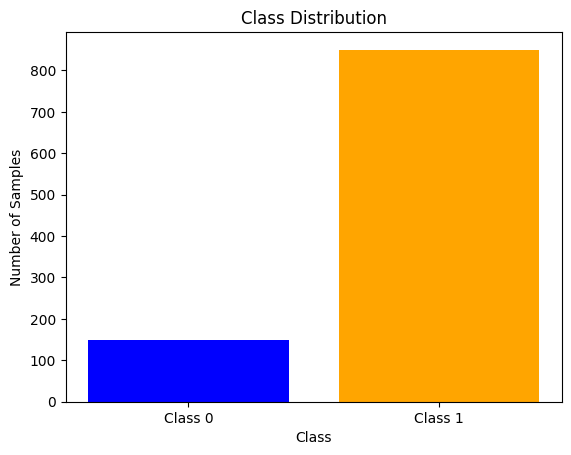

In [51]:
class_counts = np.bincount(y)
print("Samples in Class 0:", class_counts[0])
print("Samples in Class 1:", class_counts[1])

plt.bar([0, 1], class_counts, color=['blue', 'orange'])
plt.xticks([0, 1], ['Class 0', 'Class 1'])
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.title("Class Distribution")
plt.show()

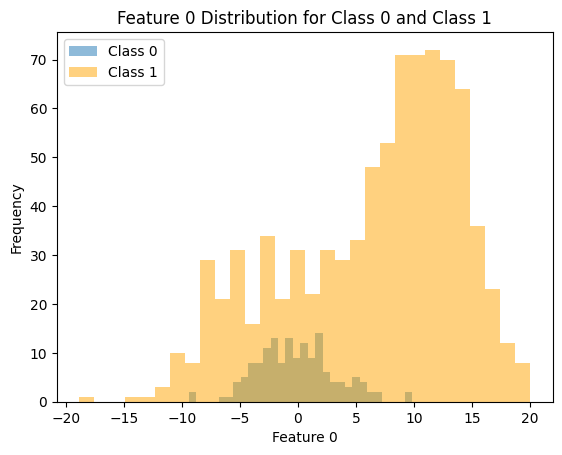

In [52]:
feature_idx = 0  # Replace with the index of a feature you'd like to analyze
plt.hist(X_class_zero[:, feature_idx], bins=30, alpha=0.5, label='Class 0')
plt.hist(X_class_one[:, feature_idx], bins=30, alpha=0.5, label='Class 1', color='orange')
plt.xlabel(f"Feature {feature_idx}")
plt.ylabel("Frequency")
plt.title(f"Feature {feature_idx} Distribution for Class 0 and Class 1")
plt.legend()
plt.show()


**TODO:** Discuss the properties of the dataset and how they influence the performance of the classifiers.

> As proposed above, the problem is that one class lies partly inbetween another class, which makes it pretty much impossible to classify consistently. The model is thereby mostly trained to classify datapoints from the other class, which makes the overall accuracy high, although only one class is classified very well.

**TODO:** Given your results and the properties of the data, reflect on accuracy (over all classes) as a metric. Propose another metric that would be better suited for this kind of dataset and explain why. Adjustments to accuracy are fine, too.


> The accuracy over all classes is misleading in this example. A metric where we take the class-wise accuracy would better reflect the accuracy of the model on this dataset, because then we could see if the accuracy reflects the model's overall ability to differentiate the classes, or if it can just classify one class consistently and not the other. Especially if there are many points in the classifiable class (so class 1 in the example above) and few points in the other class (class 0), the accuracy is completely misleading (typical example: rare illness (0.1% of humans) could never be detected by a model, but the overall accuracy would be good, because most people don't have the illness)